In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report


In [2]:
Company=pd.read_csv("Company_Data.csv")
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [4]:
Company["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [5]:
Company["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [6]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
Company.iloc[:, 6] =LabelEncoder().fit_transform(Company['ShelveLoc'])
Company.iloc[:, 6] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_26272\1720684282.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Company.iloc[:, 6] =LabelEncoder().fit_transform(Company['ShelveLoc'])


0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [8]:
Company.iloc[:, 9] =LabelEncoder().fit_transform(Company['Urban'])
Company.iloc[:, 9] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_26272\1738453694.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Company.iloc[:, 9] =LabelEncoder().fit_transform(Company['Urban'])


0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32

In [9]:
Company.iloc[:, -1] =LabelEncoder().fit_transform(Company['US'])
Company.iloc[:, -1] 

C:\Users\pirfa\AppData\Local\Temp\ipykernel_26272\4174194988.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Company.iloc[:, -1] =LabelEncoder().fit_transform(Company['US'])


0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [10]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Decision Tree

In [11]:
X=Company.iloc[:,0:10]
Y=LabelEncoder().fit_transform(Company['US'])

In [12]:
Company['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

In [13]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [14]:
# Building the decision tree classifier using entropy criteria
model = DecisionTreeClassifier(criterion='entropy')
#clmn impurity / disorder can be known with using entropy

In [15]:
# Fit the model to the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

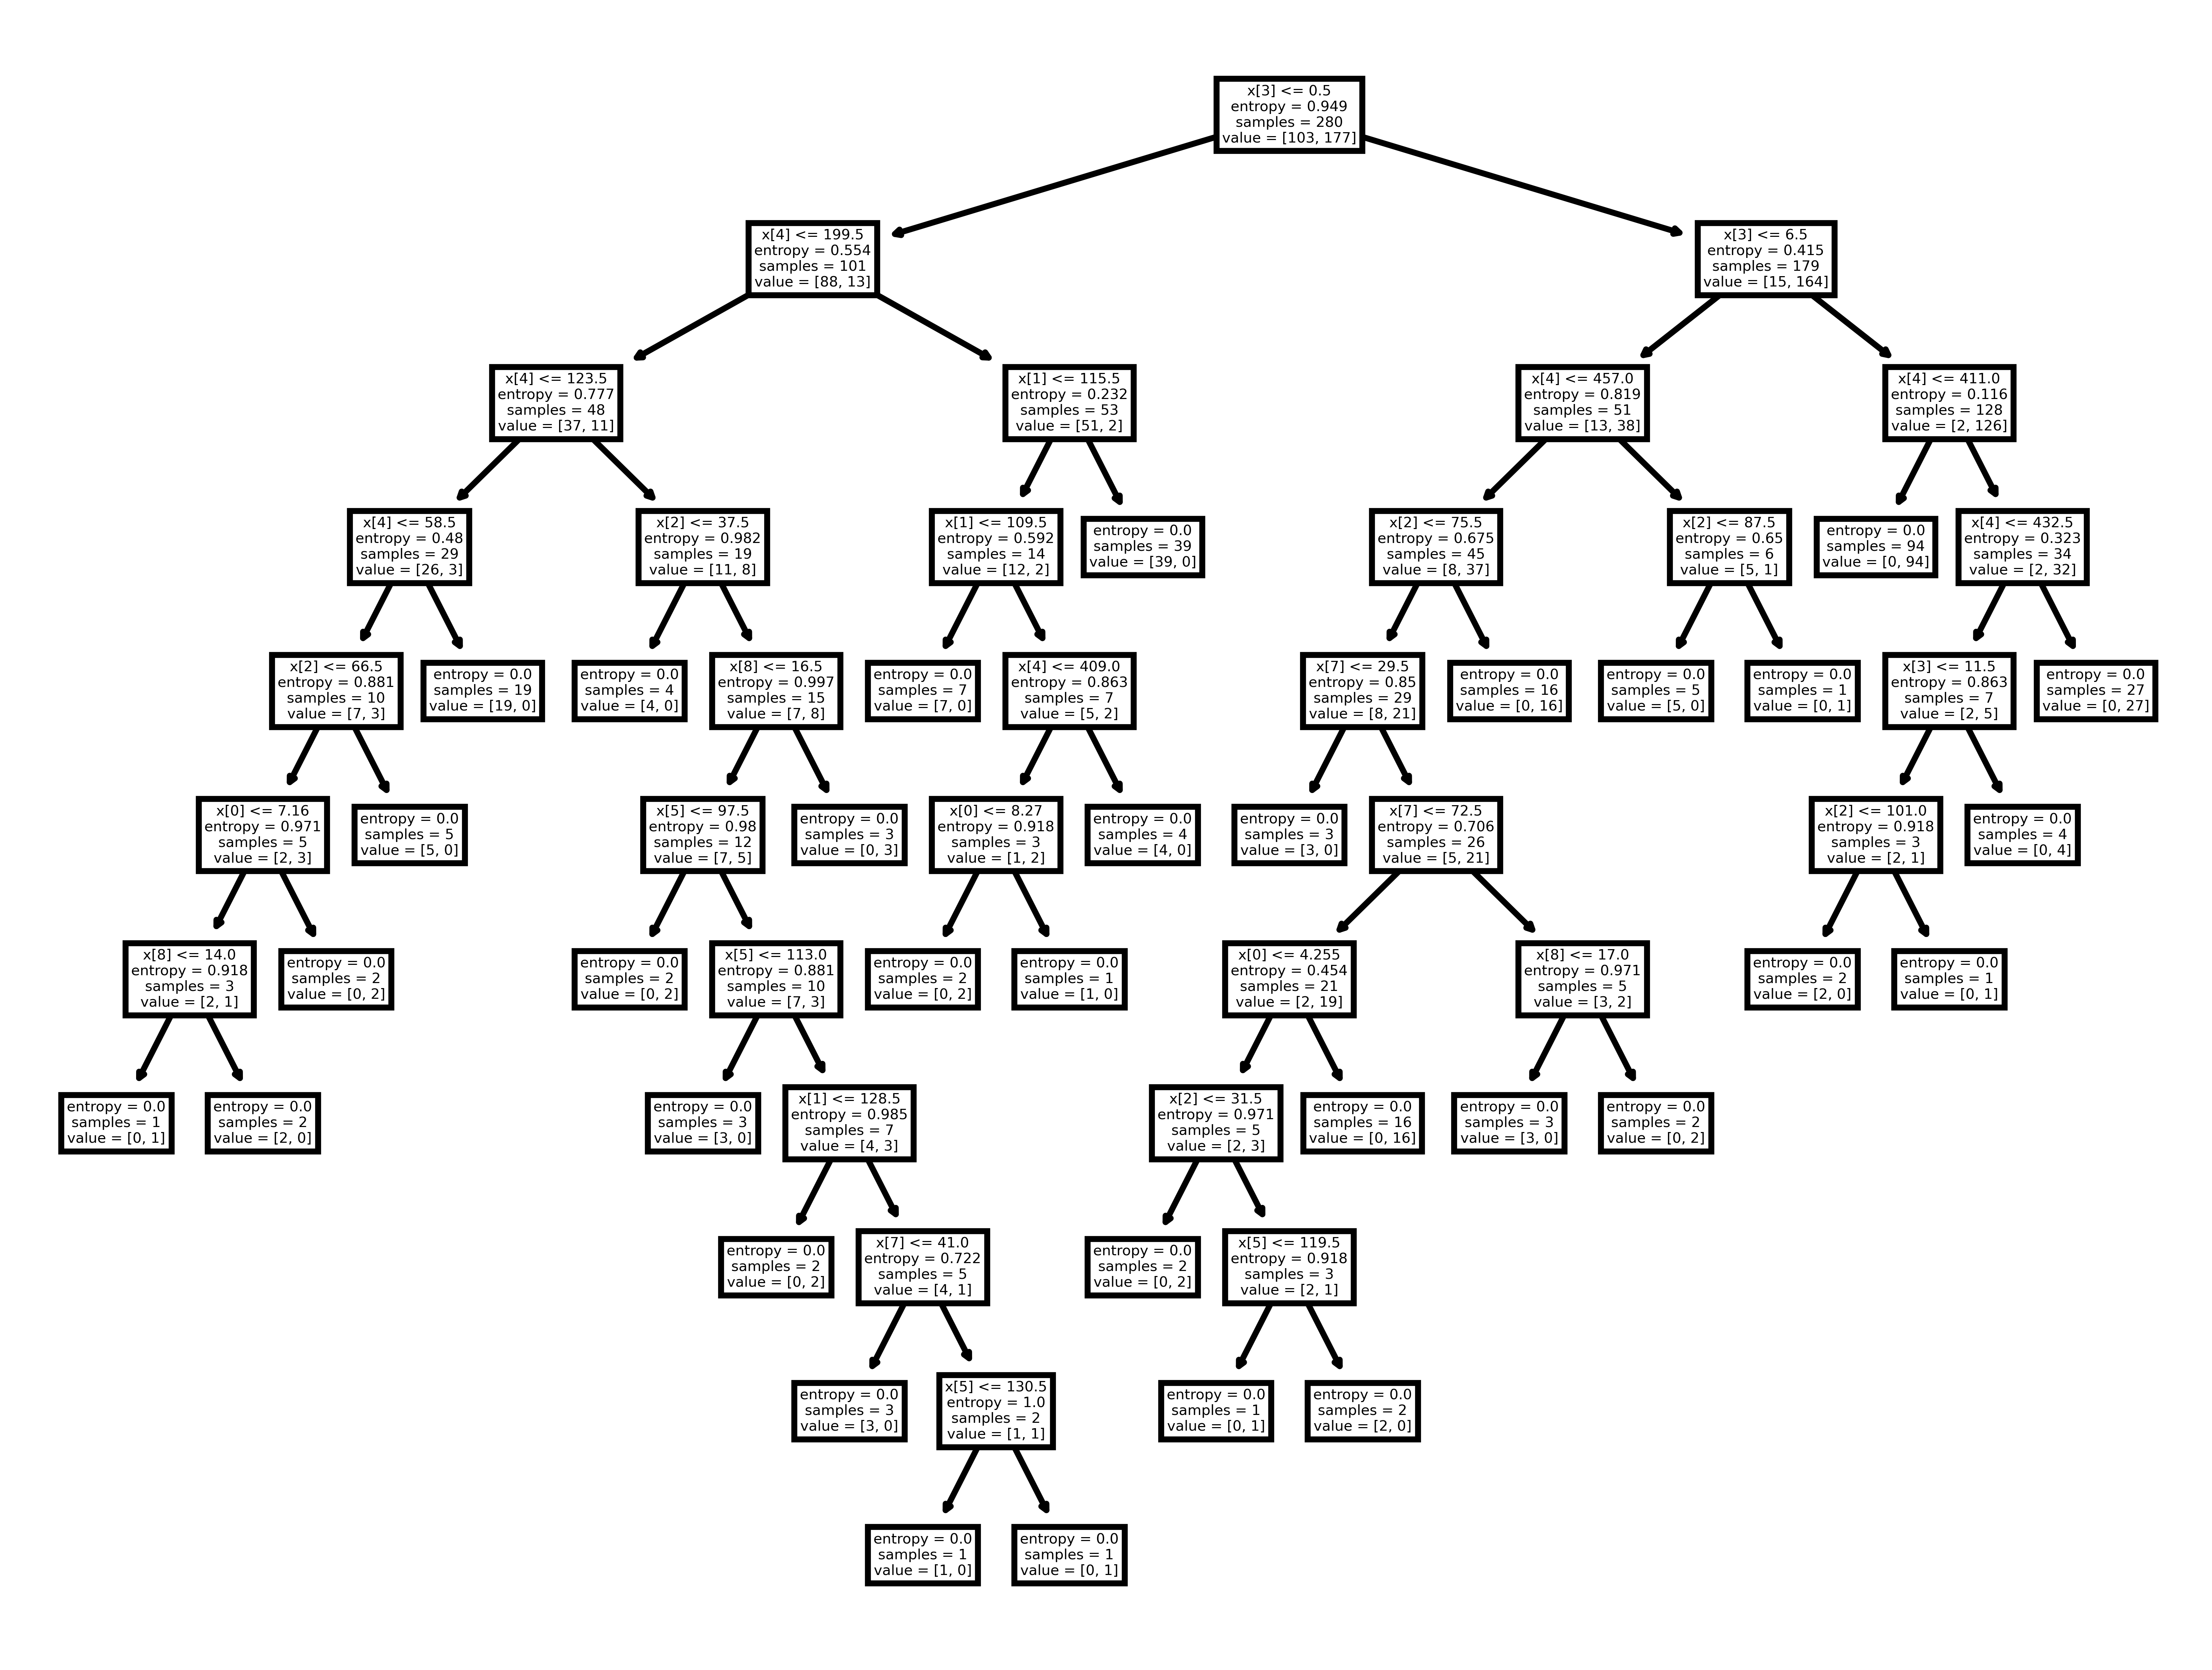

In [16]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

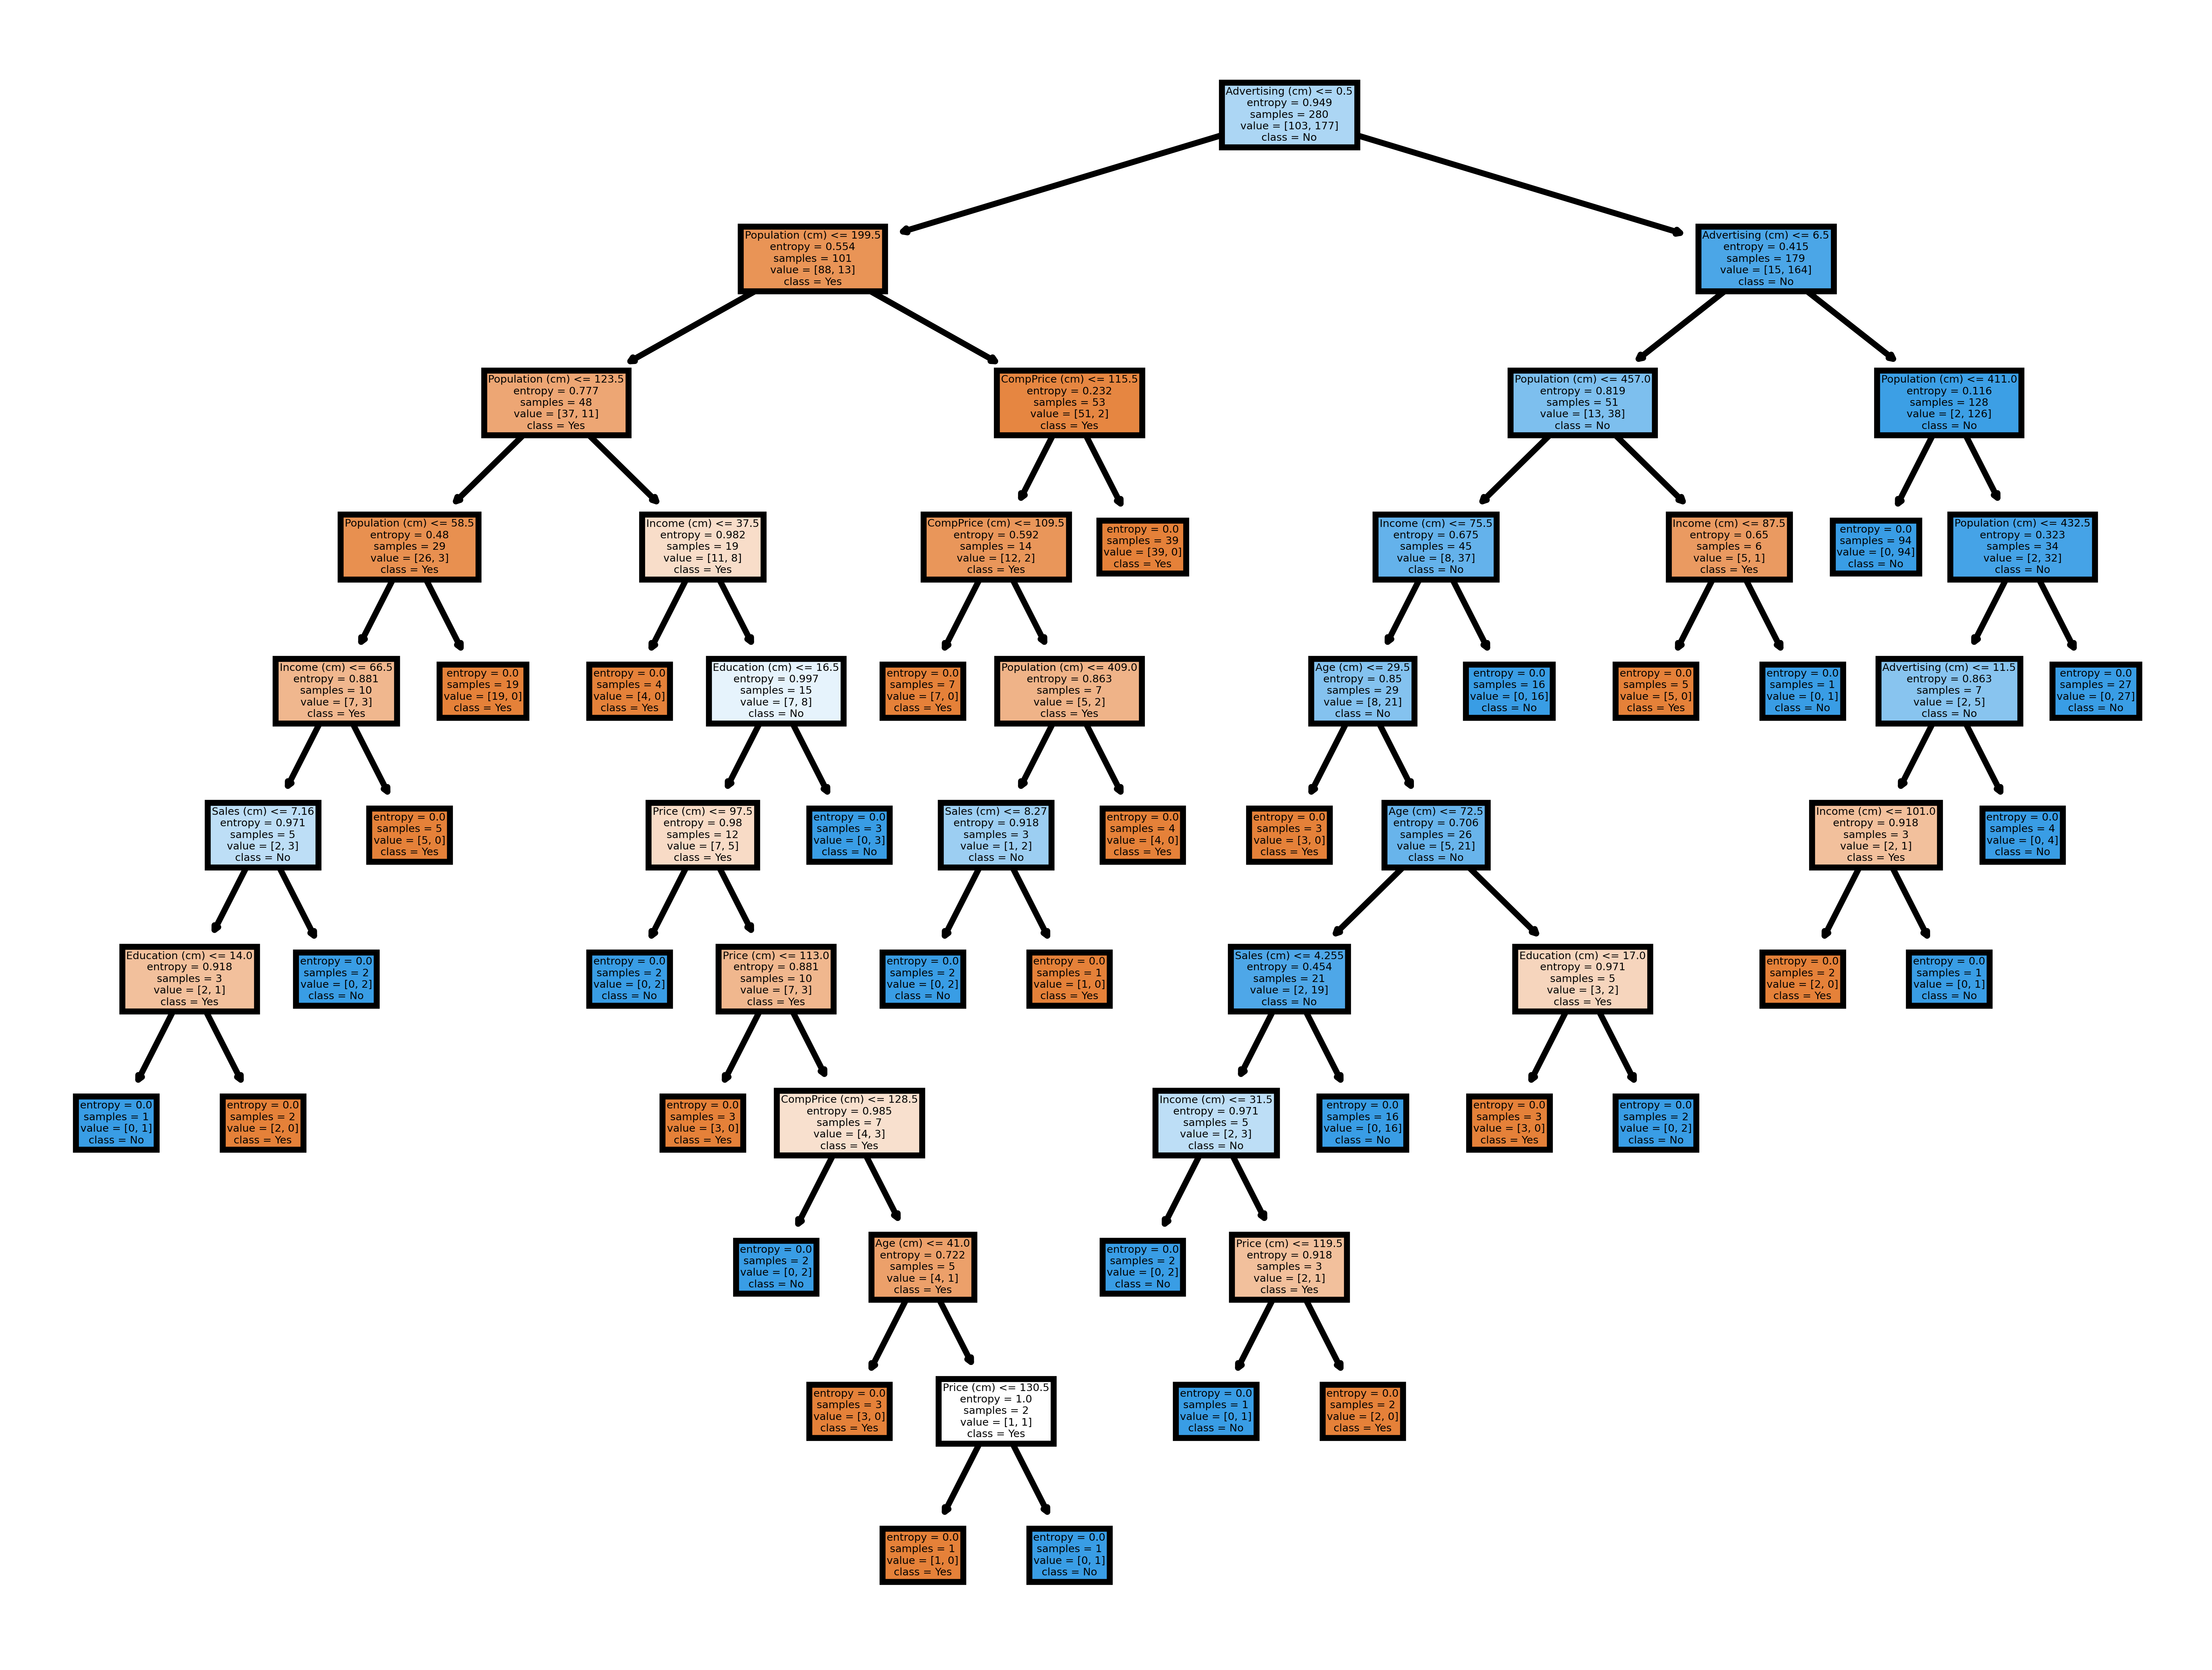

In [17]:
fn=['Sales (cm)','CompPrice (cm)','Income (cm)','Advertising (cm)','Population (cm)','Price (cm)','ShelveLoc (cm)','Age (cm)','Education (cm)','Urban (cm)']         #x clmn names
cn=['Yes', 'No']                                                   #y clmn names
plt.figure(dpi=1200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [20]:
print(classification_report(y_test,preds))
#The overall Accuracy is 78% for 120 testset

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.92      0.90      0.91        81

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.89      0.88      0.88       120



In [21]:
#Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))
#The overall Accuracy is 100% for 280 testset
#out of 92 vals of 0(No) all  predictions correct 
#Out of 188 vals of 1(Yes) all predictions correct 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       177

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [22]:
# df_t=pd.DataFrame({'Actual':y_train , 'Predicted':pred_train})
# df_t

In [23]:
# df = df_t[df_t["Actual"] != df_t["Predicted"]]
# df

In [24]:
model.feature_importances_

array([0.03585698, 0.03586888, 0.08339072, 0.58872226, 0.134646  ,
       0.03619068, 0.        , 0.04466909, 0.04065538, 0.        ])

# Conclusion

In [25]:
#Decision Tree
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
3,Advertising,0.588722
4,Population,0.134646
2,Income,0.083391
7,Age,0.044669
8,Education,0.040655
5,Price,0.036191
1,CompPrice,0.035869
0,Sales,0.035857
6,ShelveLoc,0.000000
9,Urban,0.000000


In [26]:
# It can be stated that Advertising is most important feature to increase the Company sales